In [169]:
%load_ext autoreload
%autoreload 2
import matplotlib.pylab as plt
import numpy as np

from pathlib import Path
import sys
sys.path.insert(0, str(Path("__file__").absolute().parents[1]/"fluka_comparison"))
sys.path.insert(0, str(Path("__file__").absolute().parents[1]/"corsika_comparison"))
# print(sys.path)
# print(Path("__file__").absolute().parents[1])

from fluka_muon_data import fluka_dists, fluka_data, fluka_original_dists

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [170]:
fl_data = fluka_data()

In [ ]:
fl_data

In [171]:
fluka_en_hists, en_dists, ang_dists = fluka_original_dists()

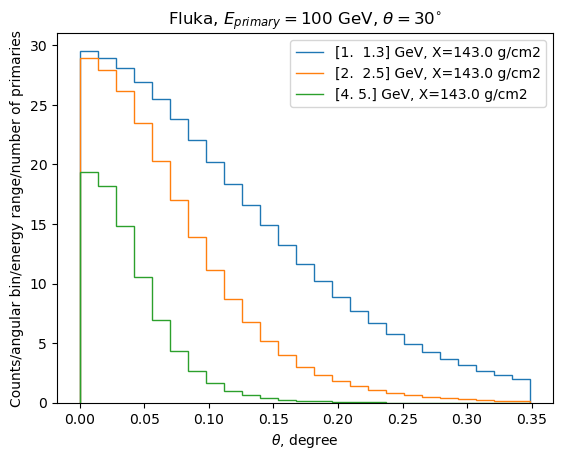

In [172]:
# ixdepth = 2

for ixdepth in range(3):
    if ixdepth in [0]: # Choose xdepths to plot
        for i, ang_dist in enumerate(ang_dists[ixdepth]):
            if i in [0, 1, 2]: # Choose energy ranges to plot
                # theta = np.arccos(1 - ang_dist[1]/(2 * np.pi))*(180/np.pi)
                # theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                # *np.sin(theta*np.pi/180)
                plt.stairs(ang_dist[0], ang_dist[1], label = f"{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

plt.title(r"Fluka, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.ylabel("Counts/angular bin/energy range/number of primaries")
# plt.xlim(0.08, 0.1)
# plt.ylim(20, 25)
plt.legend()

In [173]:
from corsika_comparison import (corsika_hist, combined_data, 
                                 corsika_en_theta_2dhist,
                                 combined_ang_data)

In [174]:
# ir_theta = np.arccos(1 - ang_dists[0][0][1]/(2*np.pi))
corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hists[0][1], ang_dists[0][0][1])
corsika_comb_hist = combined_ang_data(corsika_en_hist, (-13, 13))

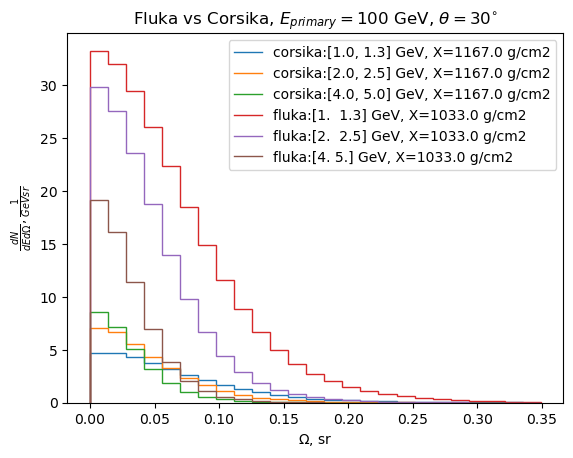

In [175]:
ixlist = [2]
for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(corsika_comb_hist[ixdepth]):
            if i in [0, 2, 4]: # Choose energy ranges to plot
                # theta = ang_dist[1]*180/(np.pi)
                # print(theta)
                # theta = ang_dists[0][0][1]
                # theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                # delta_theta = (theta[1:] - theta[:-1]) * np.pi/180
                delta_en = ang_dist[5][1] - ang_dist[5][0]
                # print(theta[1:] - theta[:-1])
                om = 2*np.pi*(1-np.cos(ang_dist[1]))
                # theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                # om = 2*np.pi*(1-np.cos(om))
                # om = ang_dist[1]
                delta_theta = (om[1:] - om[:-1])*delta_en
                plt.stairs(ang_dist[0]/delta_theta, ang_dist[1], label = f"corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(ang_dists[ixdepth]):
            if i in [0, 1, 2]: # Choose energy ranges to plot
                # theta = np.arccos(1 - ang_dist[1]/(2 * np.pi))*(180/np.pi)
                # theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                # *np.sin(theta*np.pi/180)
                plt.stairs(ang_dist[0], ang_dist[1], label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")




plt.title(r"Fluka vs Corsika, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\Omega$, sr")
plt.ylabel(r"$\frac{dN}{dEd\Omega}, \frac{1}{GeV sr}$")
plt.legend()

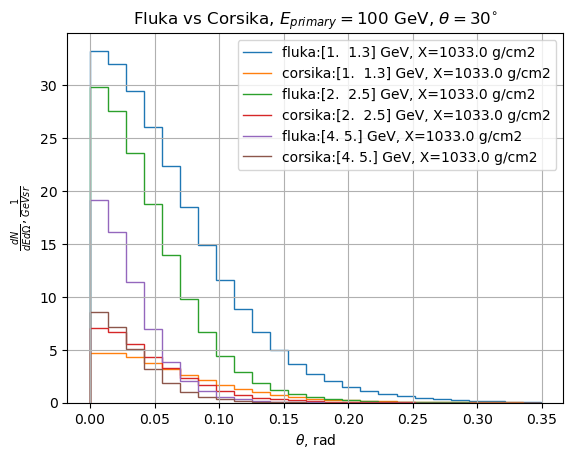

In [177]:
ixlist = [2]
for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot        
        en_list = [0, 2, 4]    
        for i in range(3):
            ang_dist = corsika_comb_hist[ixdepth][en_list[i]]
            delta_en = ang_dist[5][1] - ang_dist[5][0]
            # print(theta[1:] - theta[:-1])
            om = 2*np.pi*(1-np.cos(ang_dist[1]))
            # theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
            # om = 2*np.pi*(1-np.cos(om))
            # om = ang_dist[1]
            delta_theta = (om[1:] - om[:-1])*delta_en
            # delta_theta = delta_en
            plot_dist_cors = ang_dist[0]/delta_theta
            # plot_dist_cors = ang_dist[0]
            # plt.stairs(plot_dist_cors, ang_dist[1], label = f"corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")
            
            ang_dist = ang_dists[ixdepth][i]
            plot_dist_fluk = ang_dist[0]
            # plot_dist_fluk = ang_dist[0]*np.sin((ang_dist[1][1:] + ang_dist[1][:-1])/2*np.pi/180)
            # plot_dist_fluk = ang_dist[0]*(ang_dist[1][1:] - ang_dist[1][:-1])
            
            plt.stairs(plot_dist_fluk, ang_dist[1], label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")
            plt.stairs(plot_dist_cors, ang_dist[1], label = f"corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")
            # plt.stairs(plot_dist_fluk/plot_dist_cors, ang_dist[1], label = f"fluka/corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2") 
            # plt.stairs((np.cos((ang_dist[1][:-1] + ang_dist[1][1:])/2)**2), ang_dist[1], label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2") 



plt.title(r"Fluka vs Corsika, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, rad")
# plt.ylabel(r"fluka/corsika of $\frac{dN}{dEd\Omega}, \frac{1}{GeV sr}$")
plt.ylabel(r"$\frac{dN}{dEd\Omega}, \frac{1}{GeV sr}$")
# plt.ylim(0,10)
plt.legend()
plt.grid()

In [ ]:
ang_dists[0][0][1]

In [134]:
corsika_en_hist = corsika_hist(fluka_en_hists[0][1])

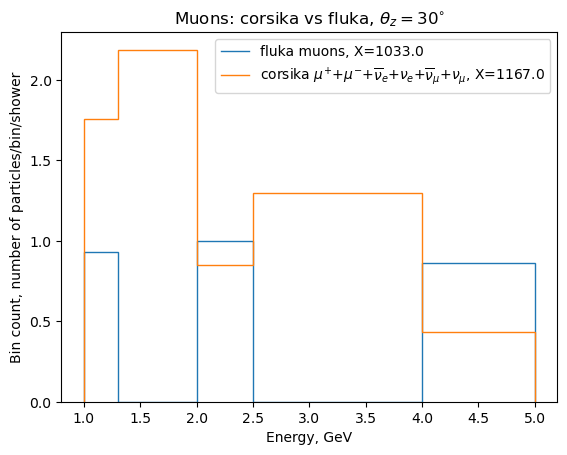

In [147]:
ixdepth = 2
cors_muons = combined_data(corsika_en_hist, (-13, 13), ixdepth)
fluk_muons = fluka_en_hists[ixdepth]

plt.stairs(fluk_muons[0], fluk_muons[1], label = f"fluka muons, X={fluk_muons[2]}")
plt.stairs(*cors_muons[0:2], label = f"corsika {cors_muons[2]}, {cors_muons[3]}")
plt.title(r"Muons: corsika vs fluka, $\theta_{z} = 30^{\circ}$")
plt.xlabel("Energy, GeV")
plt.ylabel("Bin count, number of particles/bin/shower")
plt.legend()

In [126]:
ir_theta = np.arccos(1 - ang_dists[0][0][1]/(2*np.pi))
corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hists[0][1], ir_theta)
corsika_comb_hist = combined_ang_data(corsika_en_hist, (-13, 13))

In [127]:
corsika_comb_hist = combined_ang_data(corsika_en_hist, (-13, 13))

In [110]:
corsika_comb_hist[0][0][0].size

200

In [111]:
corsika_comb_hist[0][0][1].size

201

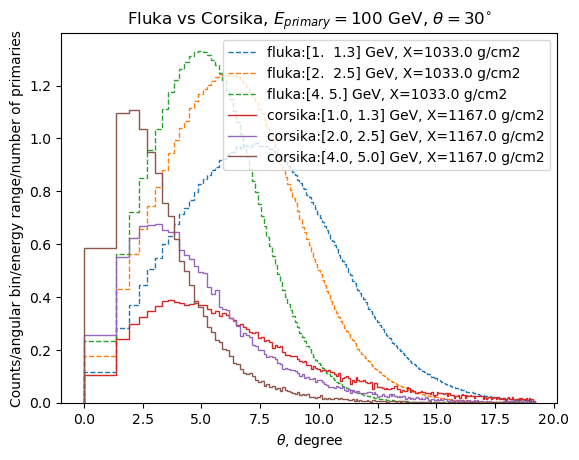

In [141]:

ixlist = [2]
for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(ang_dists[ixdepth]):
            if i in [0, 1, 2]: # Choose energy ranges to plot
                theta = np.arccos(1 - ang_dist[1]/(2 * np.pi))*(180/np.pi)
                theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                
                delta_theta = (theta[1:] - theta[:-1]) * np.pi/180
                # ang_dist[0]*2*np.pi*np.sin(theta_mid)
                plt.stairs(ang_dist[0]/delta_theta/(2*np.pi), theta, 
                           label = f"fluka:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2",
                           linestyle='--')


for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(corsika_comb_hist[ixdepth]):
            if i in [0, 2, 4]: # Choose energy ranges to plot
                theta = ang_dist[1]
                theta_mid = np.pi/180 * (theta[:-1] + theta[1:])/2
                delta_theta = (theta[1:] - theta[:-1]) * np.pi/180
                plt.stairs(ang_dist[0]/delta_theta, theta, label = f"corsika:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

plt.title(r"Fluka vs Corsika, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.ylabel("Counts/angular bin/energy range/number of primaries")
plt.legend()

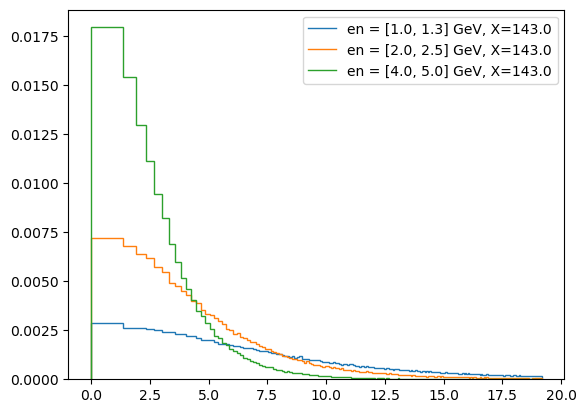

In [34]:
pdg = -13
ixdepth = 0

for ind_energy in range(5):
    if ind_energy in [0, 2, 4]:
        ang_dist = corsika_en_hist[pdg][0][ixdepth][0][ind_energy]
        en_bins = corsika_en_hist[pdg][0][ixdepth][1]
        cur_en = f"[{en_bins[ind_energy]}, {en_bins[ind_energy + 1]}]" 
        ang_bins = corsika_en_hist[pdg][0][ixdepth][2]*180/np.pi
        # xdepth = corsika_en_hist[pdg][0][ixdepth][0][ind_energy]
        xdepth = corsika_en_hist[pdg][0][ixdepth][3]
        plt.stairs(ang_dist, ang_bins, label = f"en = {cur_en} GeV, X={xdepth}")
plt.legend()

In [85]:
ir_theta = np.arccos(1 - ang_dists[0][0][1]/(2*np.pi))
corsika_en_hist = corsika_en_theta_2dhist(fluka_en_hists[0][1], ir_theta)
corsika_comb_hist = combined_ang_data(corsika_en_hist, (-13, 13))

In [86]:
corsika_en_hist_ang = corsika_en_theta_2dhist(fluka_en_hists[0][1], 
                                              np.linspace(0, 30* np.pi/180, 51))
corsika_comb_hist_ang = combined_ang_data(corsika_en_hist_ang, (-13, 13))

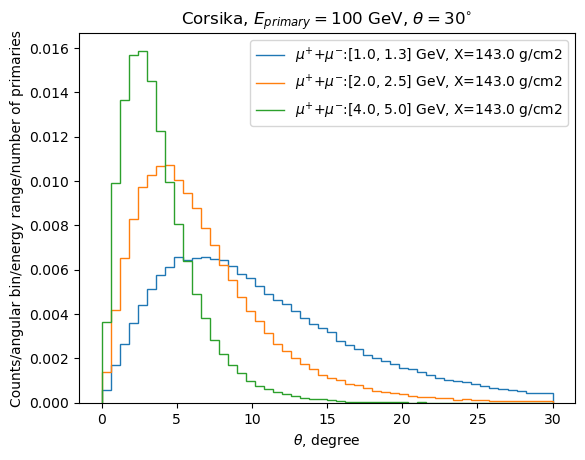

In [93]:
ixlist = [0]
ielist = [0,2,4]
for ixdepth in range(3):
    if ixdepth in ixlist: # Choose xdepths to plot
        for i, ang_dist in enumerate(corsika_comb_hist_ang[ixdepth]):
            if i in ielist: # Choose energy ranges to plot
                delta_theta = (ang_dist[1][1:] - ang_dist[1][:-1])*np.pi/180
                plt.stairs(ang_dist[0], ang_dist[1]*180/np.pi, label = f"{ang_dist[4]}:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")

# for ixdepth in range(3):
#     if ixdepth in ixlist: # Choose xdepths to plot
#         for i, ang_dist in enumerate(corsika_comb_hist[ixdepth]):
#             if i in ielist: # Choose energy ranges to plot
#                 delta_theta = (ang_dist[1][1:] - ang_dist[1][:-1])*np.pi/180
#                 plt.stairs(ang_dist[0], ang_dist[1], label = f"{ang_dist[4]}:{ang_dist[2]} GeV, X={ang_dist[3]} g/cm2")



plt.title(r"Corsika, $E_{primary}=100$ GeV, $\theta=30^{\circ}$")
plt.xlabel(r"$\theta$, degree")
plt.ylabel("Counts/angular bin/energy range/number of primaries")
plt.legend()